In [7]:
# importion
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [8]:
# data (like SVM and KNN)
np.random.seed(0)
m = 100
X = np.random.randn(m, 2)
true_theta = np.array([2.0, -3.0])
bias = -0.5
logits = X @ true_theta + bias
y = (logits > 0).astype(int)

In [9]:
# model
tree_clf = DecisionTreeClassifier(max_depth=10, random_state=0)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=10, random_state=0)

红点是 y=0 的数据点

蓝点是 y=1 的数据点

背景颜色是决策树对那一块区域的预测结果

红色区域：模型预测为 0 类

蓝色区域：模型预测为 1 类

<ipython-input-10-35aa948429a1>:19: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


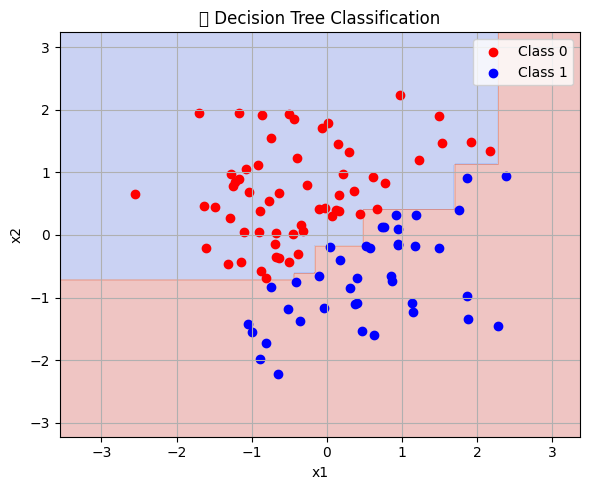

In [10]:
# visualization
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = tree_clf.predict(grid_points).reshape(xx.shape)

plt.figure(figsize=(6, 5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title("🌳 Decision Tree Classification")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()